In [1]:
import re
from urllib import request
import requests
import pandas as pd
import numpy as np

# 1. Import and Combine Datasets

In [2]:
import requests
import bs4

airbnb = requests.get("http://insideairbnb.com/get-the-data.html")
soup = bs4.BeautifulSoup(airbnb.text, 'html.parser')
soup

<!DOCTYPE html>

<html lang="en">
<head>
<link href="http://fonts.googleapis.com/css?family=Lato:400,700,900" rel="stylesheet" type="text/css"/>
<title>Get the Data - Inside Airbnb. Adding data to the debate.</title>
<meta content="Inside Airbnb is an independent, non-commercial set of tools and data that allows you to explore how Airbnb is REALLY being used in cities around the world." name="description"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=0.75, maximum-scale=0.75, user-scalable=no" name="viewport"/>
<meta content="Inside Airbnb. Adding data to the debate." property="og:title">
<meta content="Inside Airbnb" property="og:site_name">
<meta content="788070507939603" property="fb:app_id"/>
<meta content="website" property="og:type"/>
<meta content="http://insideairbnb.com" property="og:url"/>
<meta content="http://insideairbnb.com/images/insideairbnb_graphic_fb_1200x630.png" property="og:image"/>
<meta content="Inside Airbnb is a set of independent t

In [3]:
urls = []
url_all = []

for i in soup.find_all('a', {'class': ""}, href=True)[16:]:
    if 'listings.csv.gz' in i:
        urls.append(i['href'])
        
urls

['http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-12-05/data/listings.csv.gz',
 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-09-07/data/listings.csv.gz',
 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-06-03/data/listings.csv.gz',
 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-03-04/data/listings.csv.gz',
 'http://data.insideairbnb.com/belgium/vlg/antwerp/2021-12-26/data/listings.csv.gz',
 'http://data.insideairbnb.com/belgium/vlg/antwerp/2021-09-29/data/listings.csv.gz',
 'http://data.insideairbnb.com/belgium/vlg/antwerp/2021-06-29/data/listings.csv.gz',
 'http://data.insideairbnb.com/belgium/vlg/antwerp/2021-03-26/data/listings.csv.gz',
 'http://data.insideairbnb.com/united-states/nc/asheville/2021-12-15/data/listings.csv.gz',
 'http://data.insideairbnb.com/united-states/nc/asheville/2021-09-16/data/listings.csv.gz',
 'http://data.insideairbnb.com/united-states/nc/ashevill

In [4]:
url_all = ['http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-12-05/data/listings.csv.gz']

#from urls, choose the url with the closest date
city = 'amsterdam'
for url in urls:
    if url.split('/')[5] != city:
        url_all.append(url)
        city = url.split('/')[5]
        
url_all

['http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-12-05/data/listings.csv.gz',
 'http://data.insideairbnb.com/belgium/vlg/antwerp/2021-12-26/data/listings.csv.gz',
 'http://data.insideairbnb.com/united-states/nc/asheville/2021-12-15/data/listings.csv.gz',
 'http://data.insideairbnb.com/greece/attica/athens/2021-12-23/data/listings.csv.gz',
 'http://data.insideairbnb.com/united-states/tx/austin/2021-12-11/data/listings.csv.gz',
 'http://data.insideairbnb.com/thailand/central-thailand/bangkok/2021-12-23/data/listings.csv.gz',
 'http://data.insideairbnb.com/spain/catalonia/barcelona/2021-12-07/data/listings.csv.gz',
 'http://data.insideairbnb.com/australia/sa/barossa-valley/2021-12-24/data/listings.csv.gz',
 'http://data.insideairbnb.com/australia/vic/barwon-south-west-vic/2021-12-26/data/listings.csv.gz',
 'http://data.insideairbnb.com/china/beijing/beijing/2021-12-24/data/listings.csv.gz',
 'http://data.insideairbnb.com/belize/bz/belize/2021-12-28/data/listings

In [5]:
#combine datasets
df = pd.DataFrame()

for url in url_all:
    df = pd.concat([df, pd.read_csv(url)])
    
df
#is it possible to add a column to know which city the row is from??

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (58,59,67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_shared_rooms,reviews_per_month,last_searched,requires_license,region_id,region_name,region_parent_id,region_parent_name,region_parent_parent_id,region_parent_parent_name
0,2818,https://www.airbnb.com/rooms/2818,20211205213126,2021-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,0,2.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20168,https://www.airbnb.com/rooms/20168,20211205213126,2021-12-06,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,0,3.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27886,https://www.airbnb.com/rooms/27886,20211205213126,2021-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,0,2.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28871,https://www.airbnb.com/rooms/28871,20211205213126,2021-12-06,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,0,4.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29051,https://www.airbnb.com/rooms/29051,20211205213126,2021-12-06,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,...,0,5.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,53987227,https://www.airbnb.com/rooms/53987227,20211228000812,2021-12-28,cozy loft apartment 4 minute walk from Lake Zü...,"This special place is close to everything, mak...",NaN,https://a0.muscache.com/pictures/e345b971-45ea...,74718669,https://www.airbnb.com/users/show/74718669,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1856,53998419,https://www.airbnb.com/rooms/53998419,20211228000812,2021-12-28,NEW stylish serviced apartment with many extras!,Voll ausgestattete serviced Business-Loft mit ...,Coole Gegend in Zürich mit bester Anbindung an...,https://a0.muscache.com/pictures/miso/Hosting-...,198265997,https://www.airbnb.com/users/show/198265997,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1857,54009704,https://www.airbnb.com/rooms/54009704,20211228000812,2021-12-28,"Luxe Oerlikon 3.5 Room w/ Balcony, 1min to Tra...","Discover the best of Zurich, with this two-bed...",<p><b>Ideally located</b></p><br /><p>Busy Oer...,https://a0.muscache.com/pictures/prohost-api/H...,434204093,https://www.airbnb.com/users/show/434204093,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1858,54012299,https://www.airbnb.com/rooms/54012299,20211228000812,2021-12-28,"Trendy Oerlikon 3.5 Room w/ Balcony, 1min to T...",Show up and start living from day one in Zuric...,<p><b>Ideally located</b></p><br /><p>Busy Oer...,https://a0.muscache.com/pictures/prohost-api/H...,434204093,https://www.airbnb.com/users/show/434204093,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [370]:
#check missing values 
(df.isna().sum()/len(df)) * 100

id                                                0.000000
listing_url                                       0.000000
scrape_id                                         0.000000
last_scraped                                      0.000000
name                                              0.024579
description                                       2.600750
neighborhood_overview                            39.926810
picture_url                                       0.000341
host_id                                           0.000000
host_url                                          0.000000
host_name                                         0.291703
host_since                                        0.291618
host_location                                     0.485859
host_about                                       45.474803
host_response_time                               31.255254
host_response_rate                               31.255254
host_acceptance_rate                             25.9392

In [371]:
pd.set_option('display.max_rows', 10)

In [227]:
df.shape

(1171739, 82)

# 2. Data Cleaning

1. Choosing columns and put into new_df: Related columns + less than 50% of NAs 
2. Rows with NA in target variable "review_scores_rating" would be removed
3. Text features being transformed into text length
4. Deal with NAs in other columns 
5. Features with string transformed to int or float
6. List features being transformed into length of list  (TO BE DETERMINED)
7. Encode categorical features (TO BE DETERMINED)
9. Normalize numerical features (TO BE DETERMINED)

## 2.1 Create new_df

In [402]:
#select columns from df that are related to review_scores_rating
#columns that have over 50% NAs are removed
#'host_has_profile_pic', 


new_df = df.filter(['description', "neighborhood_overview", 'host_about', 'host_response_time', 'host_response_rate', 
                    'host_acceptance_rate', 'host_is_superhost', 'host_verifications', 'host_has_profile_pic',
                    'amenities', 'room_type', 'bathrooms_text', 'bedrooms', 'beds',
                   'price', 'minimum_nights', 'maximum_nights', 'instant_bookable', 
                    #'review_scores_cleanliness', 'review_scores_location', 
                    'review_scores_rating'], axis = 1)

new_df.head()

,description,neighborhood_overview,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,amenities,room_type,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,instant_bookable,review_scores_rating
0,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,t,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"[""Extra pillows and blankets"", ""Dedicated work...",Private room,1.5 shared baths,1.0,2.0,$60.00,3,28,t,4.89
1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,+ (Phone number hidden by Airbnb),NaN,NaN,NaN,f,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"[""Hangers"", ""Paid parking off premises"", ""Hair...",Private room,1 private bath,1.0,1.0,$106.00,1,365,t,4.44
2,Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100%,100%,t,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"[""Luggage dropoff allowed"", ""Outdoor dining ar...",Private room,1.5 baths,1.0,1.0,$135.00,2,730,t,4.95
3,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",Hi,within an hour,100%,100%,t,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"[""Hangers"", ""Hair dryer"", ""Coffee maker"", ""Sha...",Private room,1 shared bath,1.0,1.0,$75.00,2,1825,f,4.88
4,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,Hi,within an hour,100%,100%,t,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"[""Hangers"", ""Hair dryer"", ""Coffee maker"", ""Sha...",Private room,1 shared bath,1.0,1.0,$55.00,2,730,f,4.77


## 2.2 Dealing "review_scores_rating"

In [403]:
#rows with NA in "review_scores_rating" are eliminated: rows from 1171739 -> 893238
new_df.dropna(subset = ['review_scores_rating'], inplace=True)

#turn review_scores_rating into category (if value > 4, category 1, else 0)
new_df['review_scores_rating'] = new_df['review_scores_rating'].apply(lambda x: 1 if x>=4.85 else 0)

new_df.shape

(893238, 19)

## 2.3 Deal with Text Features

In [405]:
#"description", "neighborhood_overview", "host_about" be transformed into numerical values (e.g., text length).
new_df['description'] = new_df['description'].apply(lambda x: len(x.split()) if type(x)==str else 0)
new_df['neighborhood_overview'] = new_df['neighborhood_overview'].apply(lambda x: len(x.split()) if type(x)==str else 0)
new_df['host_about'] = new_df['host_about'].apply(lambda x: len(x.split()) if type(x)==str else 0)

In [406]:
#"host_response_rate", "host_acceptance_rate" be transformed into float (was string)
new_df['host_response_rate'] = new_df['host_response_rate'].apply(lambda x: float(x.strip('%'))/100 if type(x)==str else None)
new_df['host_acceptance_rate'] = new_df['host_acceptance_rate'].apply(lambda x: float(x.strip('%'))/100 if type(x)==str else None)

## 2.4 Deal with NAs in Other Columns

In [407]:
#deal with NAs: 
#-- host_has_profile_pic, bathrooms_text -- eliminated   
#-- host_is_superhost -- fill with False
#-- host_response_rate, host_acceptance_rate, beds, review_scores_cleanliness, review_scores_location -- fill with mean
#-- host_response_time -- fill with most frequent
#-- bedrooms -- fill with 0       

#, 'review_scores_location'
new_df.dropna(subset = ["host_has_profile_pic", "bathrooms_text"], inplace=True)
new_df['host_is_superhost'].fillna('f', inplace = True)
new_df[["host_response_rate", "host_acceptance_rate", "beds"]] = new_df[["host_response_rate", "host_acceptance_rate", "beds"]].fillna(new_df[["host_response_rate", "host_acceptance_rate", "beds"]].mean())
#new_df[['review_scores_location']] = new_df[['review_scores_location']].fillna(new_df[['review_scores_location']].mean())
new_df["host_response_time"].fillna(new_df["host_response_time"].mode().iloc[0], inplace=True)
new_df[["bedrooms"]] = new_df[["bedrooms"]].fillna(0)

## 2.5 Deal with Features not belonged as String

In [408]:
#"bathrooms_text" be turned into numerical feature (private bath/shared bath/etc. ignored)
new_df['bathrooms_text'] = new_df['bathrooms_text'].apply(lambda x: float(x.split()[0]) if 'alf-bath' not in x else 0.5)

#"price" be turned into numerical feature
new_df['price'] = new_df['price'].apply(lambda x: float(x.replace(",", "").split('$')[1]) if type(x)==str else None)

## 2.6 Deal with List Features

In [409]:
#"amenities" and "host_verifications" transformed into len(list)
new_df['amenities'] = new_df['amenities'].apply(lambda x: len(x.replace("[", "").replace("]", "").replace('"', "").split(",")))
new_df['host_verifications'] = new_df['host_verifications'].apply(lambda x: len(x.replace("[", "").replace("]", "").replace('"', "").split(",")))

##### For "host_verifications" and "amenities", we first considered using OneHotEncoder; however, these two features have a large number of category variables, and the transformation would make the vector dimension too large and too sparse, so we considered using Embedding Neural Network.

##### The code of Embedding is shown below and is run error-free. However, this method only gives a simple score without explaining the meaning of the score, making the model somewhat lacking in interpretability. Therefore, we eventually decided to use the above method to convert the list into length of list (the number of category variables) for feature engineering.

In [ ]:
#import sys
#!conda install --yes --prefix {sys.prefix} keras tensorflow

#import keras
#from keras.models import Sequential, Model
#from keras.layers import Activation, Dense, Input

In [ ]:
#Y = new_df[['host_verifications']].copy()
#Y['host_verifications_list'] = Y['host_verifications'].apply(lambda x: x.replace("[", "").replace("]", "").replace('"', "").split(","))
#verifications = Y['host_verifications_list'].apply(pd.Series).stack().reset_index(drop=True).drop_duplicates()
#verifications = verifications.apply(lambda x: x.strip().upper()).drop_duplicates()

#X = new_df[['amenities']].copy()
#X['amenities_list'] = X['amenities'].apply(lambda x: x.replace("[", "").replace("]", "").replace('"', "").split(","))
#amenities = X['amenities_list'].apply(pd.Series).stack().reset_index(drop=True).drop_duplicates()
#amenities = amenities.apply(lambda x: x.strip().upper()).drop_duplicates()

In [ ]:
#for a in [item for item in verifications]:
#    Y[a] = Y['host_verifications'].apply(lambda x: int(a in x.upper()))
#Y = Y.copy()
#Y.drop(columns = ['host_verifications', 'host_verifications_list'], inplace = True)

#for a in [item for item in amenities]:
#    X[a] = X['amenities'].apply(lambda x: int(a in x.upper()))

#X = X.copy()
#X.drop(columns = ['amenities', 'amenities_list'], inplace = True)

In [ ]:
#input_data_Y = Input(shape=(Y.shape[1],))
#encoder_Y = Dense(3, activation='relu')(input_data_Y)
#----------BOTTLENECK---------------------
#decoder_Y = Dense(3, activation='relu')(encoder_Y)
#decoder_Y = Dense(Y.shape[1], activation='sigmoid')(decoder_Y)

#autoencoder_Y = Model(input_data_Y, decoder_Y)
#autoencoder_Y.compile(optimizer='adam', loss='mse')

#input_data_X = Input(shape=(X.shape[1],))
#encoder_X = Dense(2048, activation='relu')(input_data_X)
#encoder_X = Dense(1024, activation='relu')(encoder_X)
#encoder_X = Dense(512, activation='relu')(encoder_X)
#encoder_X = Dense(128, activation='relu')(encoder_X)
#encoder_X = Dense(32, activation='relu')(encoder_X)
#encoder_X = Dense(16, activation='relu')(encoder_X)
#encoder_X = Dense(8, activation='relu')(encoder_X)
#----------BOTTLENECK---------------------
#decoder_X = Dense(16, activation='relu')(encoder_X)
#decoder_X = Dense(32, activation='relu')(decoder_X)
#decoder_X = Dense(128, activation='relu')(decoder_X)
#decoder_X = Dense(512, activation='relu')(decoder_X)
#decoder_X = Dense(1024, activation='relu')(decoder_X)
#decoder_X = Dense(2048, activation='relu')(decoder_X)
#decoder_X = Dense(X.shape[1], activation='sigmoid')(decoder_X)

#autoencoder_X = Model(input_data_X, decoder_X)
#autoencoder_X.compile(optimizer='adam', loss='mse')

In [ ]:
#import numpy as np
#for i in range(50):
#    noise = np.random.normal(loc=0.0, scale=0.1, size=Y.shape)
#    Y_noisy = Y + noise
#    autoencoder_Y.fit(Y_noisy, Y, epochs=5, batch_size=1000, shuffle=True)

#for i in range(50):
#    noise = np.random.normal(loc=0.0, scale=0.1, size=X.shape)
#    X_noisy = X + noise
#    autoencoder_X.fit(X_noisy, X, epochs=5, batch_size=1000, shuffle=True)

In [ ]:
#encoder_net_Y = Model(input_data_Y, encoder_Y)
#Y_encoded = encoder_net_Y.predict(Y, batch_size=1)

#encoder_net_X = Model(input_data_X, encoder_X)
#X_encoded = encoder_net_X.predict(X, batch_size=1)

In [ ]:
#new_df = new_df.join(pd.DataFrame(Y_encoded, columns=['host_verifications1', 'host_verifications2', 'host_verifications3']))
#new_df = new_df.drop(['host_verifications'], axis=1)

#new_df = new_df.join(pd.DataFrame(X_encoded, columns=['amenities1', 'amenities2', 'amenities3', 'amenities4', 'amenities5', 'amenities6', 'amenities7', 'amenities8']))
#new_df = new_df.drop(['amenities'], axis=1)

## 2.7 Clear Outliers

In [412]:
new_df.describe()

,description,neighborhood_overview,host_about,host_response_rate,host_acceptance_rate,host_verifications,amenities,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating
count,890175.000000,890175.000000,890175.000000,890175.000000,890175.000000,890175.000000,890175.000000,890175.000000,890175.000000,890175.000000,8.901750e+05,890175.000000,8.901750e+05,890175.000000
mean,119.684224,40.090917,38.883623,0.933856,0.849572,5.203261,26.919368,1.388102,1.581851,2.378504,9.810631e+02,12.207221,2.047883e+04,0.492947
std,52.159425,48.624401,69.631805,0.162342,0.229896,2.227544,12.334701,0.861691,1.176882,1.901446,1.638569e+04,51.562941,5.963299e+06,0.499951
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000,1.000000e+00,0.000000
25%,79.000000,0.000000,0.000000,0.933856,0.849572,3.000000,18.000000,1.000000,1.000000,1.000000,6.600000e+01,1.000000,4.500000e+01,0.000000
50%,144.000000,23.000000,9.000000,1.000000,0.930000,5.000000,26.000000,1.000000,1.000000,2.000000,1.180000e+02,2.000000,1.125000e+03,0.000000
75%,163.000000,62.000000,53.000000,1.000000,1.000000,7.000000,34.000000,1.500000,2.000000,3.000000,2.690000e+02,4.000000,1.125000e+03,1.000000
max,228.000000,223.000000,3124.000000,1.000000,1.000000,13.000000,135.000000,50.000000,50.000000,118.000000,7.411477e+06,11684.000000,2.147484e+09,1.000000


##### Features with maximum value as multiple of mean are identified as having ouliers (top 0.1% eliminated)

In [413]:
new_df = new_df[new_df.bathrooms_text < np.percentile(new_df.bathrooms_text, 99.9)]
new_df = new_df[new_df.bedrooms < np.percentile(new_df.bedrooms, 99.9)]
new_df = new_df[new_df.beds < np.percentile(new_df.beds, 99.9)]
new_df = new_df[new_df.minimum_nights < np.percentile(new_df.minimum_nights, 99.9)]
new_df = new_df[new_df.host_about < np.percentile(new_df.host_about, 99.9)]
new_df = new_df[new_df.price < np.percentile(new_df.price, 99.9)]

In [414]:
new_df.shape

(871237, 19)

## 2.8 Check Correlation

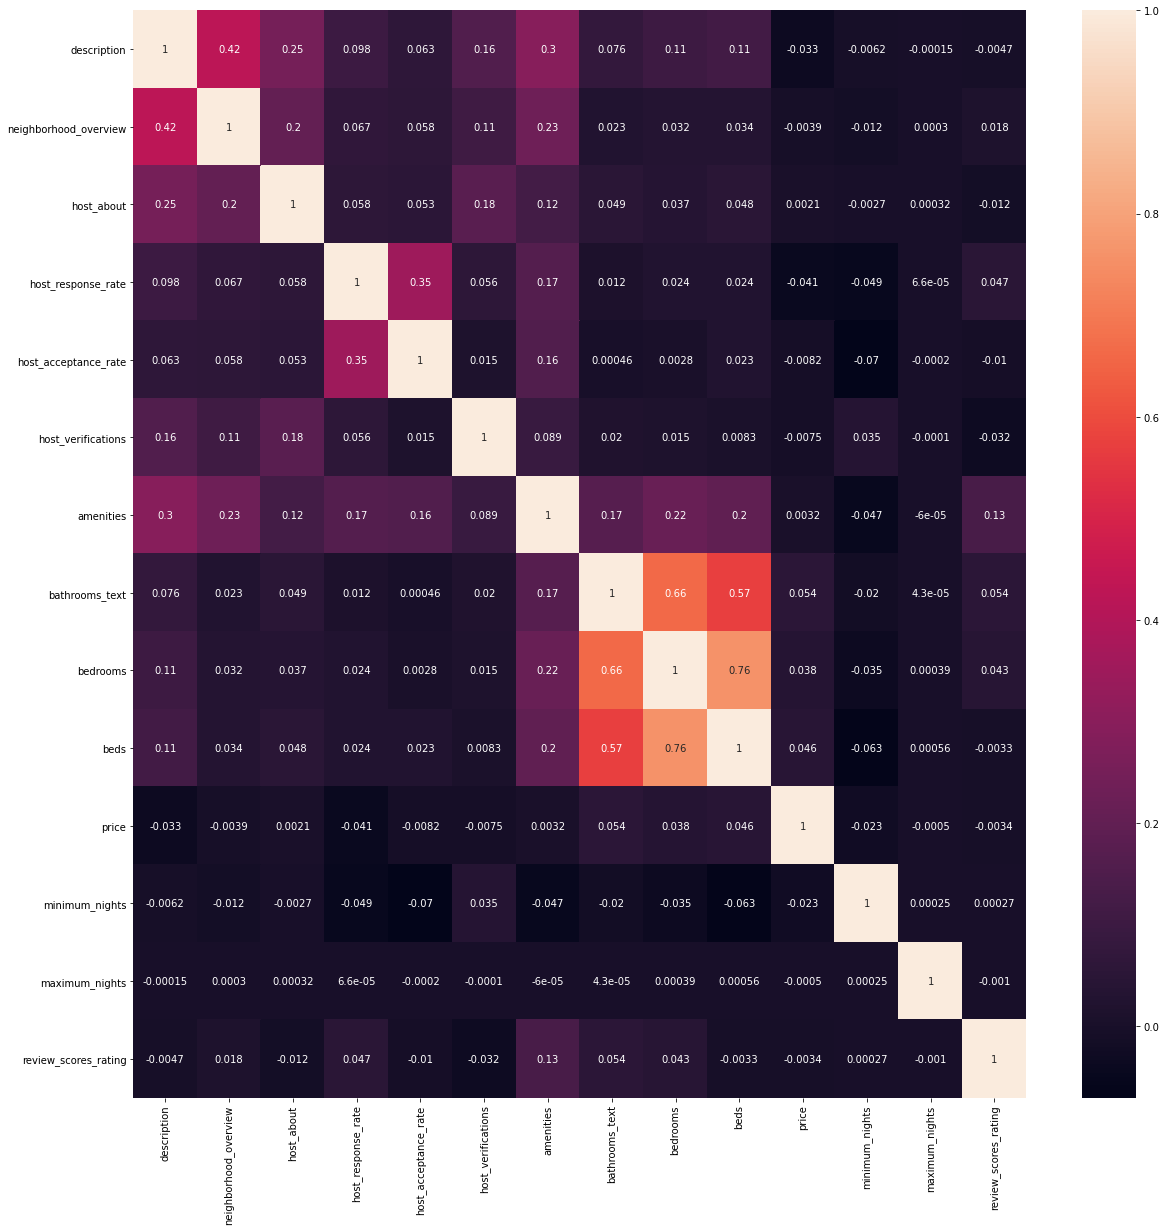

In [76]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sn.heatmap(new_df.corr(), annot=True)
plt.show()

##### Feature selection: due to the high correlation of accommodates, it is eliminated

In [379]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871237 entries, 0 to 1827
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   description            871237 non-null  int64  
 1   neighborhood_overview  871237 non-null  int64  
 2   host_about             871237 non-null  int64  
 3   host_response_time     871237 non-null  object 
 4   host_response_rate     871237 non-null  float64
 5   host_acceptance_rate   871237 non-null  float64
 6   host_is_superhost      871237 non-null  object 
 7   host_verifications     871237 non-null  int64  
 8   host_has_profile_pic   871237 non-null  object 
 9   amenities              871237 non-null  int64  
 10  room_type              871237 non-null  object 
 11  bathrooms_text         871237 non-null  float64
 12  bedrooms               871237 non-null  float64
 13  beds                   871237 non-null  float64
 14  price                  871237 non-null

# 3. Model Creation

## 3.1 Transformer

In [418]:
from sklearn.model_selection import train_test_split

X = new_df.drop(columns=["review_scores_rating"])
y = new_df['review_scores_rating']

#
boolean_features = ['host_is_superhost', 'host_has_profile_pic', 'instant_bookable']
categorical1 = ['host_response_time']
categorical2 = ['room_type']

In [419]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

cat_response = [['a few days or more', 'within a day', 'within a few hours', 'within an hour']]
cat_room = [['Shared room', 'Private room', 'Hotel room', 'Entire home/apt']]

transformer = ColumnTransformer([('ohe', OneHotEncoder(sparse=False, drop ='if_binary'), boolean_features),
                                ('ordinal_response', OrdinalEncoder(categories = cat_response), categorical1),
                                ('oridnal_room', OrdinalEncoder(categories = cat_room), categorical2)],
                                remainder='passthrough')

## 3.2 Build Evaluation Functions

In [214]:
from sklearn.model_selection import cross_val_score

def cross_validation_compas(compas_pipe, X_train, y_train):
    scores = cross_val_score(compas_pipe, X_train, y_train, cv = 10, scoring='roc_auc')
    return scores

## 3.3 Build Pipe, Fit and Evaluation

## Logistic Regression

In [382]:
from sklearn.linear_model import LogisticRegression

#build pipe with logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

pipeline_steps_lr = [('preprocessing', transformer),
                  ('scaler', StandardScaler()),
                  ('LR', LogisticRegression())]

pipe_lr = Pipeline(pipeline_steps_lr)

#mean accuracy score 
pipe_lr.fit(X_train, y_train)
print(pipe_lr.score(X_test,y_test), pipe_lr.score(X_train,y_train))

0.6352497589642349 0.6342668248709807


In [143]:
cross_validation_compas(pipe_lr, X_train, y_train)

array([0.67627728, 0.6752526 , 0.67321547, 0.67229926, 0.67805988,
       0.67835694, 0.67857878, 0.67528902, 0.67311972, 0.67308399])

In [217]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

predict_train_lr = pipe_lr.predict(X_train)
predict_test_lr  = pipe_lr.predict(X_test)

print('Accuracy_score: ', accuracy_score(y_test, predict_test_lr))
print('Recall_score: ', recall_score(y_test, predict_test_lr))
print('Precision_score: ', precision_score(y_test, predict_test_lr))
print('F1_score: ', f1_score(y_test, predict_test_lr))

Accuracy_score:  0.6352095328120076
Recall_score:  0.5453271244555649
Precision_score:  0.6584011636038153
F1_score:  0.5965532535006018


In [222]:
#metrics with train
print('Accuracy_score: ', accuracy_score(y_train, predict_train_lr))
print('Recall_score: ', recall_score(y_train, predict_train_lr))
print('Precision_score: ', precision_score(y_train, predict_train_lr))
print('F1_score: ', f1_score(y_train, predict_train_lr))

Accuracy_score:  0.6340193635243906
Recall_score:  0.5431678007818156
Precision_score:  0.6573763540341544
F1_score:  0.5948397101003486


##### Before target feature is turned into categorical feature, we tried with linear regression. The code is as followed.

In [ ]:
#from sklearn.linear_model import LinearRegression

#build pipe with logistic regression
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

#pipeline_steps_lr = [('preprocessing', transformer),
#                  ('scaler', StandardScaler()),
#                  ('LR', LinearRegression())]

#pipe_lr = Pipeline(pipeline_steps_lr)

#mean accuracy score 
#pipe_lr.fit(X_train, y_train)
#print(pipe_lr.score(X_test,y_test), pipe_lr.score(X_train,y_train))

In [ ]:
#from sklearn.metrics import mean_squared_error

#Linear regression RMSE
#predict_train_lr = pipe_lr.predict(X_train)
#predict_test_lr  = pipe_lr.predict(X_test)

#rmse_train_lr = np.sqrt(mean_squared_error(y_train, predict_train_lr))
#rmse_test_lr = np.sqrt(mean_squared_error(y_test, predict_test_lr))

#print("RMSE on test (LR): %f" % (rmse_test_lr))
#print("RMSE on train (LR): %f" % (rmse_train_lr))

In [229]:
#if the coefficient are the same order as transformer.fit_transform(X_train), then the table would be as follows

#trans_columns = ['host_is_superhost_TRUE', 'instant_bookable_TRUE', 
#                 'host_response_time', 'room_type', 'description', 'neighborhood_overview',
#          'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_verifications', 'amenities', 'bathrooms_text', 
#          'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights']

#coeff_df = pd.DataFrame(pipe_lr[2].coef_, trans_columns, columns = ['Coefficient'])
#coeff_df

## Decision Tree Classifier

In [383]:
from sklearn.tree import DecisionTreeClassifier

#build pipe with decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

pipeline_steps_dt = [('preprocessing', transformer),
                  ('scaler', StandardScaler()),
                  ('DT', DecisionTreeClassifier())]

pipe_dt = Pipeline(pipeline_steps_dt)

#mean accuracy score
pipe_dt.fit(X_train, y_train)
print (pipe_dt.score(X_test,y_test), pipe_dt.score(X_train,y_train))

0.586181763922685 0.9975724150596351


In [95]:
cross_validation_compas(pipe_dt, X_train, y_train)

array([0.58586049, 0.58240495, 0.58358537, 0.58312732, 0.58352387,
       0.58316502, 0.58475637, 0.5828995 , 0.58555235, 0.58412532])

In [219]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

predict_train_dt = pipe_dt.predict(X_train)
predict_test_dt = pipe_dt.predict(X_test)

print('Accuracy_score: ', accuracy_score(y_test, predict_test_dt))
print('Recall_score: ', recall_score(y_test, predict_test_dt))
print('Precision_score: ', precision_score(y_test, predict_test_dt))
print('F1_score: ', f1_score(y_test, predict_test_dt))

Accuracy_score:  0.5856721377216351
Recall_score:  0.5788620146418312
Precision_score:  0.5814822141286261
F1_score:  0.580169156019435


In [87]:
#metrics with train

print('Accuracy_score: ', accuracy_score(y_train, predict_train_dt))
print('Recall_score: ', recall_score(y_train, predict_train_dt))
print('Precision_score: ', precision_score(y_train, predict_train_dt))
print('F1_score: ', f1_score(y_train, predict_train_dt))

Accuracy_score:  0.9975724150596351
Recall_score:  0.9958861695280836
Precision_score:  0.9992059059653042
F1_score:  0.9975432758064937


##### Before target feature is turned into categorical feature, we tried with decision tree regressor. The code is as followed.

In [ ]:
#from sklearn.tree import DecisionTreeRegressor

#build pipe with decision tree
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

#pipeline_steps_dt = [('preprocessing', transformer),
#                  ('scaler', StandardScaler()),
#                  ('DT', DecisionTreeRegressor())]

#pipe_dt = Pipeline(pipeline_steps_dt)

#mean accuracy score
#pipe_dt.fit(X_train, y_train)
#print (pipe_dt.score(X_test,y_test), pipe_dt.score(X_train,y_train))

In [ ]:
#from sklearn.metrics import mean_squared_error

#Decision Tree RMSE
#predict_train_dt = pipe_dt.predict(X_train)
#predict_test_dt  = pipe_dt.predict(X_test)

#rmse_train_dt = np.sqrt(mean_squared_error(y_train, predict_train_dt))
#rmse_test_dt = np.sqrt(mean_squared_error(y_test, predict_test_dt))

#print("RMSE on test (LR): %f" % (rmse_test_lr))
#print("RMSE on train (LR): %f" % (rmse_train_lr))

## Random Forest Classifier

In [420]:
from sklearn.ensemble import  RandomForestClassifier

#build pipe with random forest
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

pipeline_steps_rf = [('preprocessing', transformer),
                  ('scaler', StandardScaler()),
                  ('RF', RandomForestClassifier(bootstrap=True, n_estimators=10))]

pipe_rf = Pipeline(pipeline_steps_rf)

#mean accuracy score
pipe_rf.fit(X_train, y_train)
print (pipe_rf.score(X_test,y_test), pipe_rf.score(X_train,y_train))

0.6309857215003902 0.9819796295206954


In [242]:
cross_validation_compas(pipe_rf, X_train, y_train)

array([0.680594  , 0.6799223 , 0.68206122, 0.67815581, 0.68082535,
       0.67938841, 0.68015408, 0.68117599, 0.68121584, 0.67942054])

In [221]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

predict_train_rf = pipe_rf.predict(X_train)
predict_test_rf = pipe_rf.predict(X_test)

print('Accuracy_score: ', accuracy_score(y_test, predict_test_rf))
print('Recall_score: ', recall_score(y_test, predict_test_rf))
print('Precision_score: ', precision_score(y_test, predict_test_rf))
print('F1_score: ', f1_score(y_test, predict_test_rf))

Accuracy_score:  0.6323221907135287
Recall_score:  0.5598531183393569
Precision_score:  0.6486163673940467
F1_score:  0.6009748697479513


In [88]:
#metrics with train
print('Accuracy_score: ', accuracy_score(y_train, predict_train_rf))
print('Recall_score: ', recall_score(y_train, predict_train_rf))
print('Precision_score: ', precision_score(y_train, predict_train_rf))
print('F1_score: ', f1_score(y_train, predict_train_rf))

Accuracy_score:  0.9822809255239322
Recall_score:  0.9726237483112712
Precision_score:  0.9914095236969486
F1_score:  0.9819267940035006


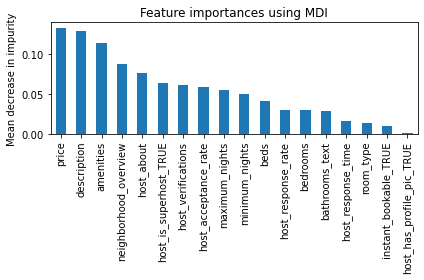

In [421]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the most important features with Random forest (without review_scores_cleanliness and review_scores_location)
features =  ['host_is_superhost_TRUE', 'host_has_profile_pic_TRUE', 'instant_bookable_TRUE', 
             'host_response_time', 'room_type', 'description', 'neighborhood_overview',
          'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_verifications', 
             'amenities', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights']
             #'review_scores_cleanliness', 'review_scores_location']

importances = pipe_rf[2].feature_importances_

sorted_list = sorted([(importance, feature) for feature, importance in zip(features, importances)], reverse=True)

features_sorted, importance_sorted = [], []

for i in sorted_list:
    features_sorted += [i[1]]
    importance_sorted += [i[0]]

fig, ax = plt.subplots()
pd.Series(importance_sorted, index=features_sorted).plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [422]:
pd.DataFrame(list(zip(features_sorted, importance_sorted)),columns =['Feature', 'MDI'])

,Feature,MDI
0,price,0.133364
1,description,0.128920
2,amenities,0.113796
3,neighborhood_overview,0.088350
4,host_about,0.076788
...,...,...
13,bathrooms_text,0.028385
14,host_response_time,0.016230
15,room_type,0.013922
16,instant_bookable_TRUE,0.010013


##### Before target feature is turned into categorical feature, we tried with random forest regressor. The code is as followed.

In [ ]:
#from sklearn.ensemble import  RandomForestRegressor

#build pipe with random forest
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

#pipeline_steps_rf = [('preprocessing', transformer),
#                  ('scaler', StandardScaler()),
#                  ('RF', RandomForestRegressor(bootstrap=True, n_estimators=10))]

#pipe_rf = Pipeline(pipeline_steps_rf)

#r-square
#pipe_rf.fit(X_train, y_train)
#print (pipe_rf.score(X_test,y_test), pipe_rf.score(X_train,y_train))

In [ ]:
#from sklearn.metrics import mean_squared_error

#Random forest RMSE
#predict_train_rf = pipe_rf.predict(X_train)
#predict_test_rf  = pipe_rf.predict(X_test)

#rmse_train_rf = np.sqrt(mean_squared_error(y_train, predict_train_rf))
#rmse_test_rf = np.sqrt(mean_squared_error(y_test, predict_test_rf))

#print("RMSE on test (RF): %f" % (rmse_test_rf))
#print("RMSE on train (RF): %f" % (rmse_train_rf))

## GridSearchCV

In [398]:
from sklearn.model_selection import GridSearchCV

param_grid = {'RF__criterion' : ['gini', 'entropy'],
              'RF__max_features' : ['sqrt', 'log2', None],
              'RF__max_depth' : [10,15,20], #pre-pruning
              'RF__min_samples_split' : [10,20,50,100],#pre-pruning
              #'RF__max_leaf_nodes' : [10,15,20,25],#pre-pruning
             }


CV_GS = GridSearchCV(pipe_rf, param_grid, cv = 5, verbose=3)

CV_GS.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_split=10; total time=  17.5s
[CV 2/5] END RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_split=10; total time=  16.6s
[CV 3/5] END RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_split=10; total time=  18.4s
[CV 4/5] END RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_split=10; total time=  24.1s
[CV 5/5] END RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_split=10; total time=  20.4s
[CV 1/5] END RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_split=20; total time=  19.7s
[CV 2/5] END RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_split=20; total time=  17.7s
[CV 3/5] END RF__criterion=gini, RF__max_depth=10, RF__max_features=sqrt, RF__min_samples_split=20; total

[CV 5/5] END RF__criterion=gini, RF__max_depth=15, RF__max_features=sqrt, RF__min_samples_split=20; total time=  19.4s
[CV 1/5] END RF__criterion=gini, RF__max_depth=15, RF__max_features=sqrt, RF__min_samples_split=50; total time=  23.4s
[CV 2/5] END RF__criterion=gini, RF__max_depth=15, RF__max_features=sqrt, RF__min_samples_split=50; total time=  19.3s
[CV 3/5] END RF__criterion=gini, RF__max_depth=15, RF__max_features=sqrt, RF__min_samples_split=50; total time=  17.8s
[CV 4/5] END RF__criterion=gini, RF__max_depth=15, RF__max_features=sqrt, RF__min_samples_split=50; total time=  17.5s
[CV 5/5] END RF__criterion=gini, RF__max_depth=15, RF__max_features=sqrt, RF__min_samples_split=50; total time=  17.1s
[CV 1/5] END RF__criterion=gini, RF__max_depth=15, RF__max_features=sqrt, RF__min_samples_split=100; total time=  17.4s
[CV 2/5] END RF__criterion=gini, RF__max_depth=15, RF__max_features=sqrt, RF__min_samples_split=100; total time=  17.1s
[CV 3/5] END RF__criterion=gini, RF__max_depth

[CV 4/5] END RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_split=100; total time=  18.3s
[CV 5/5] END RF__criterion=gini, RF__max_depth=20, RF__max_features=sqrt, RF__min_samples_split=100; total time=  18.5s
[CV 1/5] END RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_split=10; total time=  19.4s
[CV 2/5] END RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_split=10; total time=  22.1s
[CV 3/5] END RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_split=10; total time=  19.2s
[CV 4/5] END RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_split=10; total time=  20.2s
[CV 5/5] END RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_split=10; total time=  19.7s
[CV 1/5] END RF__criterion=gini, RF__max_depth=20, RF__max_features=log2, RF__min_samples_split=20; total time=  19.1s
[CV 2/5] END RF__criterion=gini, RF__max_depth

[CV 3/5] END RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_split=20; total time=  15.5s
[CV 4/5] END RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_split=20; total time=  14.4s
[CV 5/5] END RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_split=20; total time=  14.4s
[CV 1/5] END RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_split=50; total time=  14.1s
[CV 2/5] END RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_split=50; total time=  14.3s
[CV 3/5] END RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_split=50; total time=  14.2s
[CV 4/5] END RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_split=50; total time=  14.4s
[CV 5/5] END RF__criterion=entropy, RF__max_depth=10, RF__max_features=log2, RF__min_samples_split=50; total time=  13.9s
[CV 1/5] END RF__criteri

[CV 1/5] END RF__criterion=entropy, RF__max_depth=15, RF__max_features=log2, RF__min_samples_split=100; total time=  17.2s
[CV 2/5] END RF__criterion=entropy, RF__max_depth=15, RF__max_features=log2, RF__min_samples_split=100; total time=  17.1s
[CV 3/5] END RF__criterion=entropy, RF__max_depth=15, RF__max_features=log2, RF__min_samples_split=100; total time=  17.1s
[CV 4/5] END RF__criterion=entropy, RF__max_depth=15, RF__max_features=log2, RF__min_samples_split=100; total time=  17.4s
[CV 5/5] END RF__criterion=entropy, RF__max_depth=15, RF__max_features=log2, RF__min_samples_split=100; total time=  17.4s
[CV 1/5] END RF__criterion=entropy, RF__max_depth=15, RF__max_features=None, RF__min_samples_split=10; total time=  55.7s
[CV 2/5] END RF__criterion=entropy, RF__max_depth=15, RF__max_features=None, RF__min_samples_split=10; total time=  55.8s
[CV 3/5] END RF__criterion=entropy, RF__max_depth=15, RF__max_features=None, RF__min_samples_split=10; total time=  55.3s
[CV 4/5] END RF__cr

[CV 3/5] END RF__criterion=entropy, RF__max_depth=20, RF__max_features=None, RF__min_samples_split=10; total time= 6.0min
[CV 4/5] END RF__criterion=entropy, RF__max_depth=20, RF__max_features=None, RF__min_samples_split=10; total time= 3.6min
[CV 5/5] END RF__criterion=entropy, RF__max_depth=20, RF__max_features=None, RF__min_samples_split=10; total time=21.9min
[CV 1/5] END RF__criterion=entropy, RF__max_depth=20, RF__max_features=None, RF__min_samples_split=20; total time= 8.9min
[CV 2/5] END RF__criterion=entropy, RF__max_depth=20, RF__max_features=None, RF__min_samples_split=20; total time= 8.4min
[CV 3/5] END RF__criterion=entropy, RF__max_depth=20, RF__max_features=None, RF__min_samples_split=20; total time= 3.7min
[CV 4/5] END RF__criterion=entropy, RF__max_depth=20, RF__max_features=None, RF__min_samples_split=20; total time= 5.9min
[CV 5/5] END RF__criterion=entropy, RF__max_depth=20, RF__max_features=None, RF__min_samples_split=20; total time= 9.9min
[CV 1/5] END RF__criteri

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       sparse=False),
                                                                         ['host_is_superhost',
                                                                          'host_has_profile_pic',
                                                                          'instant_bookable']),
                                                                        ('ordinal_response',
                                                                         OrdinalEncoder(categories=[['a '
                                                                  

In [399]:
CV_GS.best_score_

0.6524536225687569

In [400]:
CV_GS.best_params_

{'RF__criterion': 'entropy',
 'RF__max_depth': 20,
 'RF__max_features': 'log2',
 'RF__min_samples_split': 100}

##### The final selection of params are {'RF__criterion': 'entropy', 'RF__max_depth': 20, 'RF__max_features': 'sqrt', 'RF__min_samples_split': 100}

In [415]:
predict_train_rf = CV_GS.predict(X_train)
predict_test_rf = CV_GS.predict(X_test)

print('Accuracy_score: ', accuracy_score(y_test, predict_test_rf))
print('Recall_score: ', recall_score(y_test, predict_test_rf))
print('Precision_score: ', precision_score(y_test, predict_test_rf))
print('F1_score: ', f1_score(y_test, predict_test_rf))

Accuracy_score:  0.6532298792525596
Recall_score:  0.6278204666193925
Precision_score:  0.6553054662379422
F1_score:  0.641268597347392


In [416]:
CV_GS.score(X_test, y_test)

0.6532298792525596

## Rebuild Random Forest with best params

In [428]:
from sklearn.ensemble import  RandomForestClassifier

#build pipe with random forest
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

pipeline_steps_rf = [('preprocessing', transformer),
                  ('scaler', StandardScaler()),
                  ('RF', RandomForestClassifier(bootstrap=True, n_estimators=10, 
                                                criterion='entropy', max_depth = 20, max_features = 'sqrt', min_samples_split = 100))]

pipe_rf = Pipeline(pipeline_steps_rf)

#mean accuracy score
pipe_rf.fit(X_train, y_train)
print (pipe_rf.score(X_test,y_test), pipe_rf.score(X_train,y_train))

0.6530175382213856 0.7005835099262686


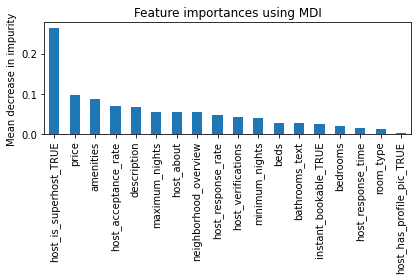

In [429]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the most important features with Random forest (without review_scores_cleanliness and review_scores_location)
features =  ['host_is_superhost_TRUE', 'host_has_profile_pic_TRUE', 'instant_bookable_TRUE', 
             'host_response_time', 'room_type', 'description', 'neighborhood_overview',
          'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_verifications', 
             'amenities', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights']
             #'review_scores_cleanliness', 'review_scores_location']

importances = pipe_rf[2].feature_importances_

sorted_list = sorted([(importance, feature) for feature, importance in zip(features, importances)], reverse=True)

features_sorted, importance_sorted = [], []

for i in sorted_list:
    features_sorted += [i[1]]
    importance_sorted += [i[0]]

fig, ax = plt.subplots()
pd.Series(importance_sorted, index=features_sorted).plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [430]:
pd.DataFrame(list(zip(features_sorted, importance_sorted)),columns =['Feature', 'MDI'])

,Feature,MDI
0,host_is_superhost_TRUE,0.264650
1,price,0.096630
2,amenities,0.086792
3,host_acceptance_rate,0.070101
4,description,0.067274
...,...,...
13,instant_bookable_TRUE,0.025171
14,bedrooms,0.019068
15,host_response_time,0.013347
16,room_type,0.013213
